<h1>ИУ5-62Б Никитина Ксения</h1>

<h2>РК2. Вариант 13</h2>

Задание. Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы: Метод опорных векторов, Случайный лес. Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [12]:
data = pd.read_csv('marvel-wikia-data.csv')
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [14]:
print('Количество пропущенных значений')
data.isnull().sum()

Количество пропущенных значений


page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

Удалим строки с пропущенными значениями и столбцы, не влияющие на целевой признак

In [15]:
#Удаление строк с пустыми значениями
data = data.dropna(axis=0)

In [16]:
data.isnull().sum()

page_id             0
name                0
urlslug             0
ID                  0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
GSM                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
Year                0
dtype: int64

In [17]:
data = data[:500]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 28 to 14106
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           58 non-null     int64  
 1   name              58 non-null     object 
 2   urlslug           58 non-null     object 
 3   ID                58 non-null     object 
 4   ALIGN             58 non-null     object 
 5   EYE               58 non-null     object 
 6   HAIR              58 non-null     object 
 7   SEX               58 non-null     object 
 8   GSM               58 non-null     object 
 9   ALIVE             58 non-null     object 
 10  APPEARANCES       58 non-null     float64
 11  FIRST APPEARANCE  58 non-null     object 
 12  Year              58 non-null     float64
dtypes: float64(2), int64(1), object(10)
memory usage: 6.3+ KB


Для решения задачи классификации выполним кодирование категориальных признаков

In [18]:
for col in data.columns:
    print('{} - {}'.format(col, len(data[col].unique())))

page_id - 58
name - 58
urlslug - 58
ID - 3
ALIGN - 3
EYE - 10
HAIR - 12
SEX - 3
GSM - 5
ALIVE - 2
APPEARANCES - 48
FIRST APPEARANCE - 50
Year - 32


In [19]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [20]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = LE.fit_transform(data[col])

In [21]:
data.dtypes

page_id               int64
name                  int64
urlslug               int64
ID                    int64
ALIGN                 int64
EYE                   int64
HAIR                  int64
SEX                   int64
GSM                   int64
ALIVE                 int64
APPEARANCES         float64
FIRST APPEARANCE      int64
Year                float64
dtype: object

Так как выполняется задача небинарной классификации и в тестовой выборке возможен дисбаланс классов, были выбраны следующие метрики:
 - precision
 - recall
 - f1-score

Всем метрикам был задан уровень детализации average='weighted'.

In [22]:
def print_metrics(y_test, y_pred):
    rep = classification_report(y_test, y_pred, output_dict=True)
    print("weighted precision:", rep['weighted avg']['precision'])
    print("weighted recall:", rep['weighted avg']['recall'])
    print("weighted f1-score:", rep['weighted avg']['f1-score'])
    plt.figure(figsize=(4, 3))
    plt.title('Матрица ошибок')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['ALIVE'], axis=1), data['ALIVE'], test_size=0.5, random_state=17)

SVC. Базовая модель.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,APPEARANCES,FIRST APPEARANCE,Year
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.531342e-17,6.891039e-17,6.891039e-17,-2.297013e-17,-1.382993e-16,6.508204e-17,-1.033656e-16,7.656711e-17,1.531342e-17,-5.742533e-17,-5.359697e-17,3.828355e-17
std,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00
min,-7.283974e-01,-1.444525e+00,-1.444525e+00,-1.597502e+00,-1.443990e+00,-1.211295e+00,-1.472665e+00,-1.090576e+00,-1.206501e+00,-6.766172e-01,-1.704559e+00,-2.833696e+00
25%,-7.248001e-01,-9.370943e-01,-9.370943e-01,-4.096160e-01,5.157106e-02,-7.300956e-01,-7.100348e-01,-1.090576e+00,-1.206501e+00,-6.173365e-01,-6.689680e-01,-8.008272e-01
50%,-5.968647e-01,-1.477576e-01,-1.477576e-01,7.782703e-01,5.157106e-02,-2.488962e-01,-7.100348e-01,9.498567e-01,6.350006e-01,-4.826078e-01,2.142602e-02,3.696126e-01
75%,5.603338e-01,8.671039e-01,8.671039e-01,7.782703e-01,5.157106e-02,2.323032e-01,8.152251e-01,9.498567e-01,6.350006e-01,-8.919974e-02,8.498988e-01,8.008272e-01
max,2.018800e+00,1.769203e+00,1.769203e+00,7.782703e-01,1.547132e+00,3.119500e+00,3.103115e+00,9.498567e-01,2.476502e+00,3.208961e+00,1.609332e+00,1.108838e+00


weighted precision: 0.6848989298454221
weighted recall: 0.8275862068965517
weighted f1-score: 0.749512036434613


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


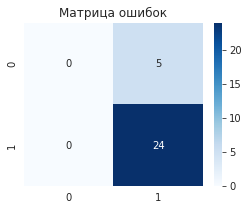

In [25]:
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

Подбор гиперпараметров

In [26]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.03), np.arange(2, 20, 1)])}
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_macro')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


{'C': 3.0}


Лучшая модель

weighted precision: 0.6620689655172415
weighted recall: 0.6896551724137931
weighted f1-score: 0.6755805770584097


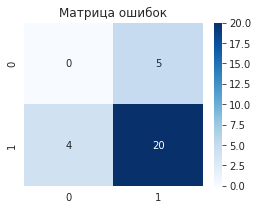

In [27]:
best_svm_model = grid_cv.best_estimator_
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

RandomForestClassifier. Базовая модель

weighted precision: 0.8817733990147782
weighted recall: 0.8620689655172413
weighted f1-score: 0.8213969938107869


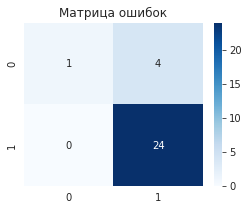

In [28]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

Подбор гиперпараметров

In [29]:
params = {'n_estimators': [5, 10, 50, 100], 'max_features': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5]}
grid_cv = GridSearchCV(estimator=rfc_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_weighted')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


{'criterion': 'gini', 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 5}


Лучшая модель

weighted precision: 0.6743295019157087
weighted recall: 0.7586206896551724
weighted f1-score: 0.713995943204868


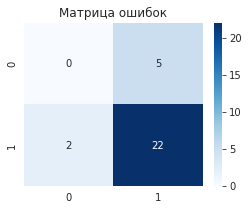

In [30]:
best_rfc_model = grid_cv.best_estimator_
best_rfc_model.fit(x_train, y_train)
y_pred_rfc = best_rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

Сравнение результатов

Выведем лучшие результаты моделей

SVC result

weighted precision: 0.6620689655172415
weighted recall: 0.6896551724137931
weighted f1-score: 0.6755805770584097


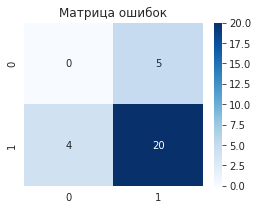

In [31]:
print("SVC result\n")
print_metrics(y_test, y_pred_svm)

RandomForestClassifier result

weighted precision: 0.6743295019157087
weighted recall: 0.7586206896551724
weighted f1-score: 0.713995943204868


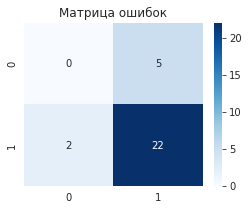

In [32]:
print("RandomForestClassifier result\n")
print_metrics(y_test, y_pred_rfc)

Вывод: для метода случайного леса модель по умолчанию оказалась лучше модели с подобранными параметрами. Эта же модель показала лучшие результаты по сравнению с моделями SVM.